# Introduction
Forest Fire UCI Dataset Data Analysis and Deep Learning Model Construction <br>
This Project Made By 3 People (Indonesia AI Batch 14 Mentee): <br>
* Raihan Nugroho Jauhari (Exploratory Data Analysis Part, Part A-E) 
* Andhika Rahadian (Features Engineering, Deep Learning Model Training&Evaluation, Part F-H)
* Muhammad Insan Al-Amin (Machine Learning Model Training&Evaluation, not included in this notebook)


# A. Define Project & Matrix



## 1.   Objective Project

In this notebook, our goal is to predict the burned area (area) of forest fires (regression task), in the northeast region of Portugal. Based on the the spatial, temporal, and weather variables where the fire is spotted.

This prediction can be used for calculating the forces sent to the incident and deciding the urgency of the situation.

## 2.   Matrix

**RMSE**

RMSE is the most popular evaluation metric used in regression problems. It follows an assumption that error are unbiased and follow a normal distribution.

# B. Load Dependency

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

# import statsmodels.api as sm
# from statsmodels.compat import lzip
# import statsmodels.stats.api as sms
# from statsmodels.formula.api import ols
from scipy.stats import zscore
# from statsmodels.stats.stattools import durbin_watson
# from sklearn.model_selection import train_test_split,KFold
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error
# from sklearn.feature_selection import RFECV
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

In [ ]:
plt.rcParams["figure.figsize"] = 9,5

# C. Load and Describe Dataset

In [ ]:
# path = 'forestfires.csv'
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

print("Dataset terdiri dari : ", df.shape[0]," Row dan ", df.shape[1]," Kolom")

df.head()

Dataset terdiri dari :  517  Row dan  13  Kolom


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

## Checking Missing Value

In [ ]:
df.isna().sum().sum()

0

# D. Exploratory Data Analysis (EDA)

EDA Analysis :

*   Univariate
*   Bivariate
*   Multivariate

In [ ]:
target_var = 'area'

### 1. Univariate analysis

Skewness: 12.846933533934868
Kurtosis: 194.1407210942299


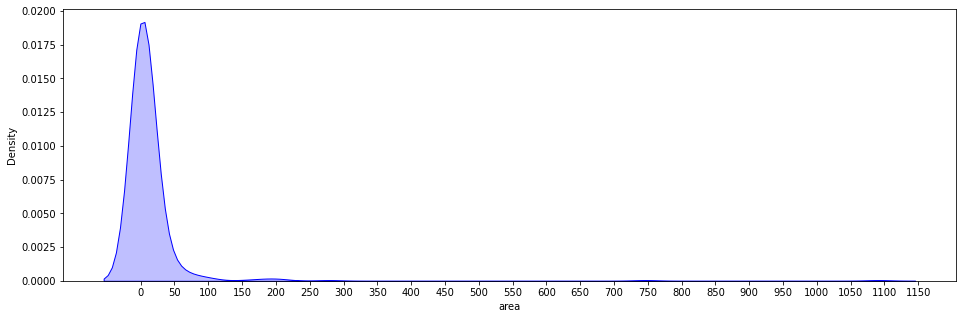

In [ ]:
plt.figure(figsize=(16,5))
print("Skewness: {}".format(df[target_var].skew()))
print("Kurtosis: {}".format(df[target_var].kurtosis()))
ax = sns.kdeplot(df[target_var],shade=True,color='b')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


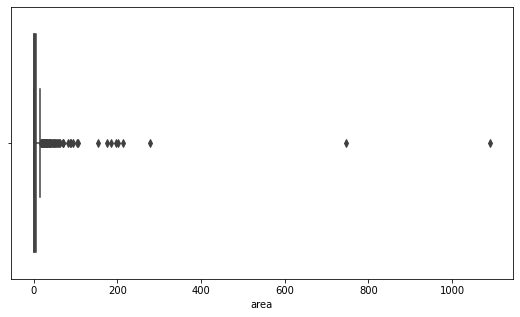

In [ ]:
axes = sns.boxplot(df[target_var])

**EDA Conclusion:**

*   The data is very skewed (+12.84) 
and big kurtosis (194).

*   It even tells us that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

* To fix the skewnesss and kurtosis, we need to transform it. However we will have to inverse transform before submitting the output.

* Outlier : There are 4 outlier

In [ ]:
# Show Outliers Data using Z-Score

y_outliers = df[abs(zscore(df[target_var])) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


#### Devide Categorical columns and Numeric columns

In [ ]:
df_independent = df.drop(columns=target_var)
cat_columns = df_independent.select_dtypes(include='object').columns.tolist()
num_columns = df_independent.select_dtypes(exclude='object').columns.tolist()

cat_columns,num_columns

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

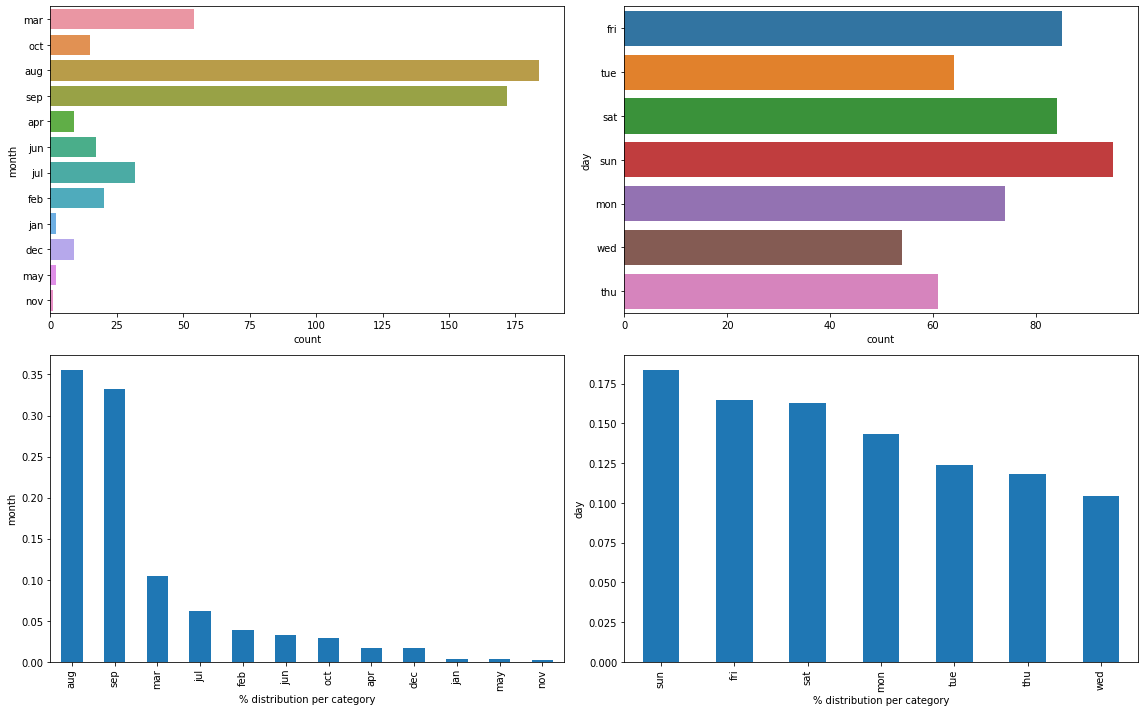

In [ ]:
# analyzing categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df_independent,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()   

*   We can see that abnormally high number of the forest fires occur in the month of **August** and **September**.

*   If we talk about day, the days Friday to Monday have higher proportion of cases.

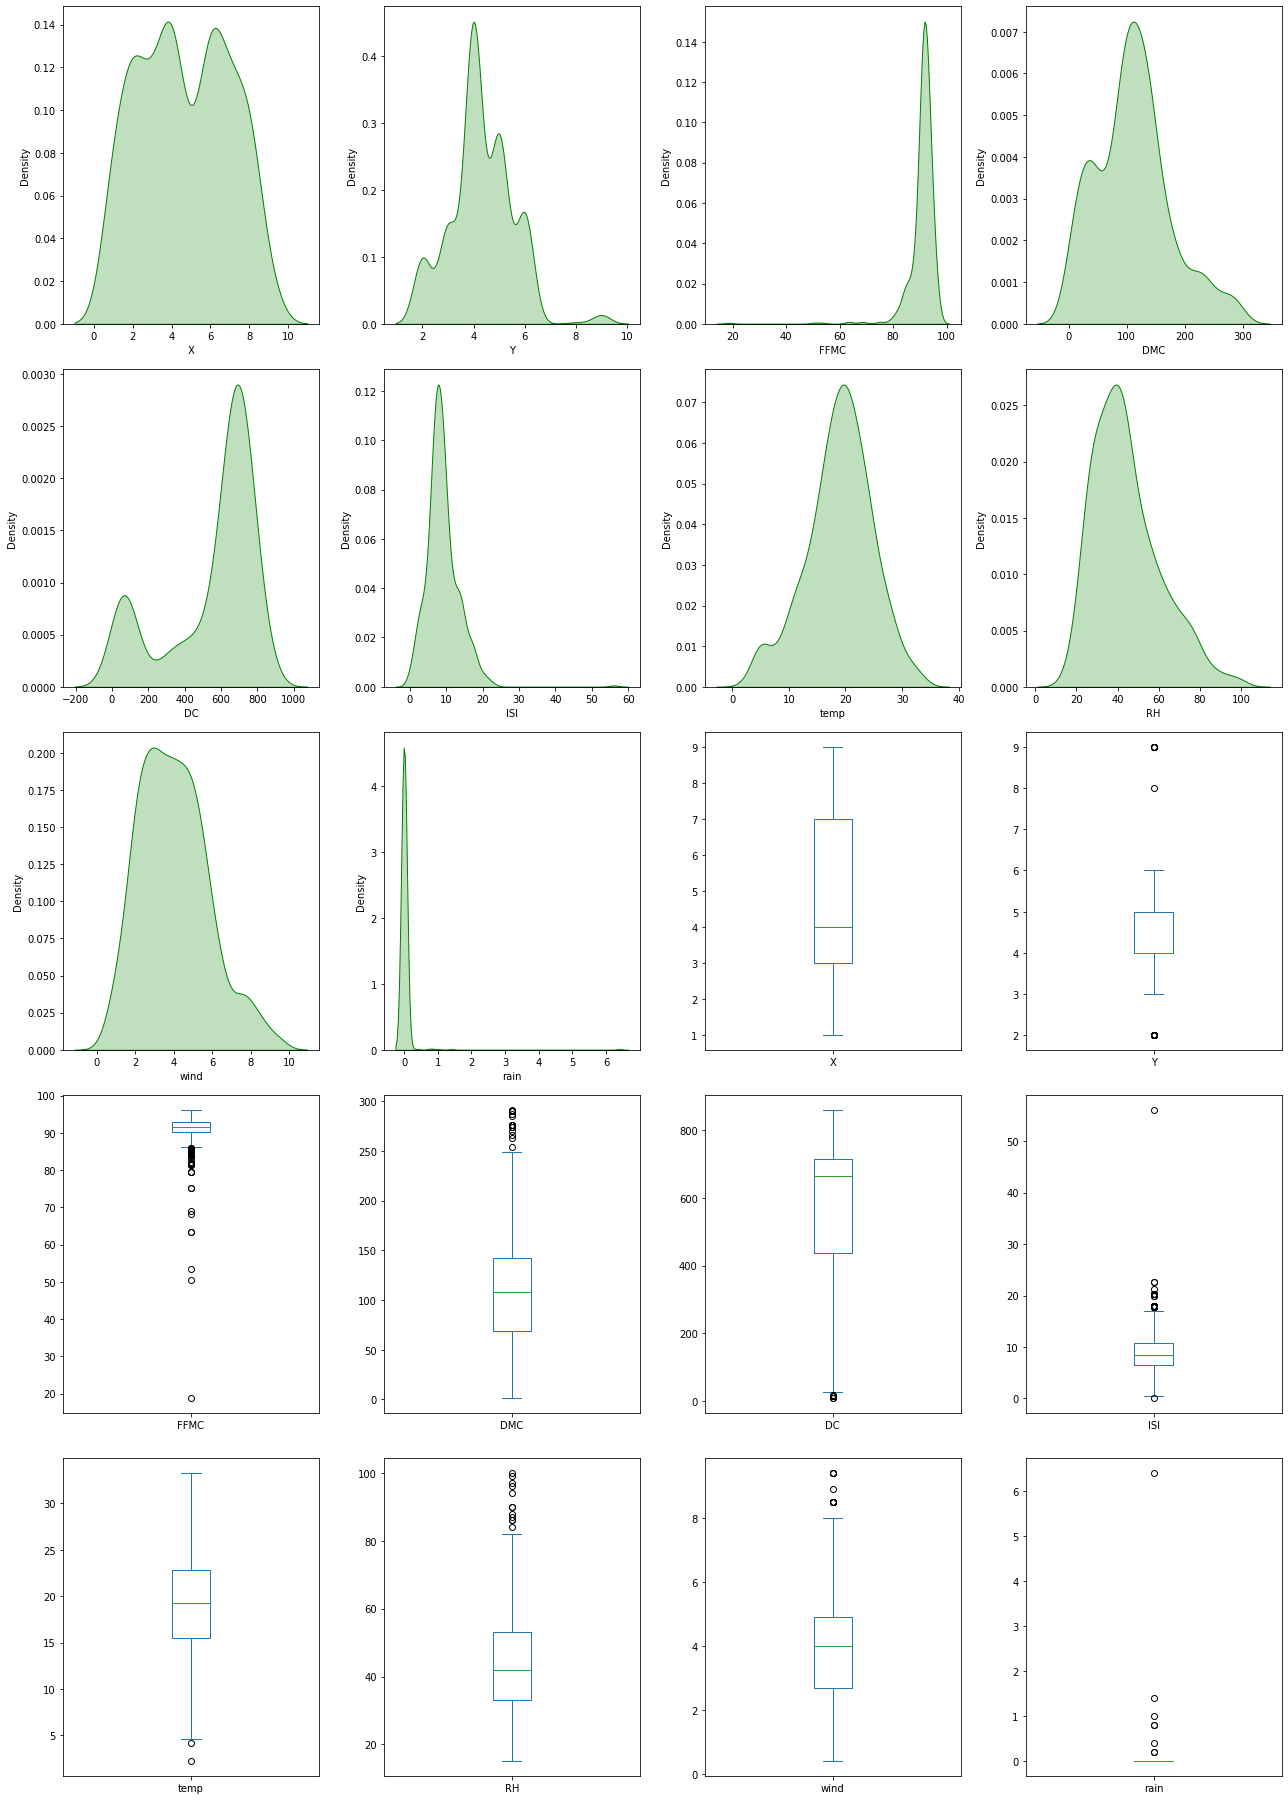

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

We decided that Outliers, Skewness and kurtosis (positive/negative) was in :

*  FFMC
*  ISI
*  rain

### Bivariate analysis with our target variable

In [ ]:
print(df['area'].describe(),'\n')
print(y_outliers)

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53


In [ ]:
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return 0
    elif area <= 1:
        return 1
    elif area <= 25:
        return 2
    elif area <= 100:
        return 3
    else:
        return 4

def area_bin_cat(area):
    if area == 0.0:
        return 0
    else:
        return 1

# For Visualizing Purpose
def area_cat_vis(area):
    if area == 0.0:
        return "No Damage"
    elif area <= 1:
        return "Low"
    elif area <= 25:
        return "Moderate"
    elif area <= 100:
        return "High"
    else:
        return "Very High"

def area_bin_cat_vis(area):
    if area == 0.0:
        return "No Fire"
    else:
        return "Fire Detected"
df_vis = pd.DataFrame()
df_vis['damage_category'] = df['area'].apply(area_cat_vis)
df_vis['fire_status'] = df['area'].apply(area_bin_cat_vis)
df['damage_category'] = df['area'].apply(area_cat)
df['fire_status'] = df['area'].apply(area_bin_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category,fire_status
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0


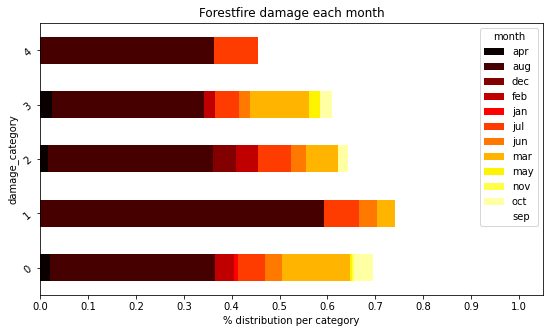

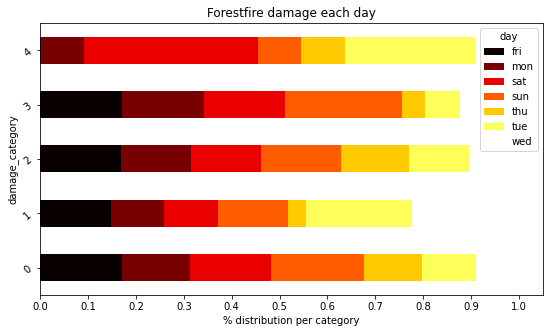

In [ ]:
for col in cat_columns:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

1.  Previously we had observed that August and 
September had the most number of forest fires. And from the above plot of month, we can understand few things
    *    Most of the fires in August were low (< 1 hectare).
    *    The very high damages(>100 hectares) happened in only 3 months - august,july and september.

2.  Regarding fire damage per day, nothing much can be observed. Except that, there were no very high damaging fires on Friday and on Saturdays it has been reported most.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.7% of the points cannot be placed; y

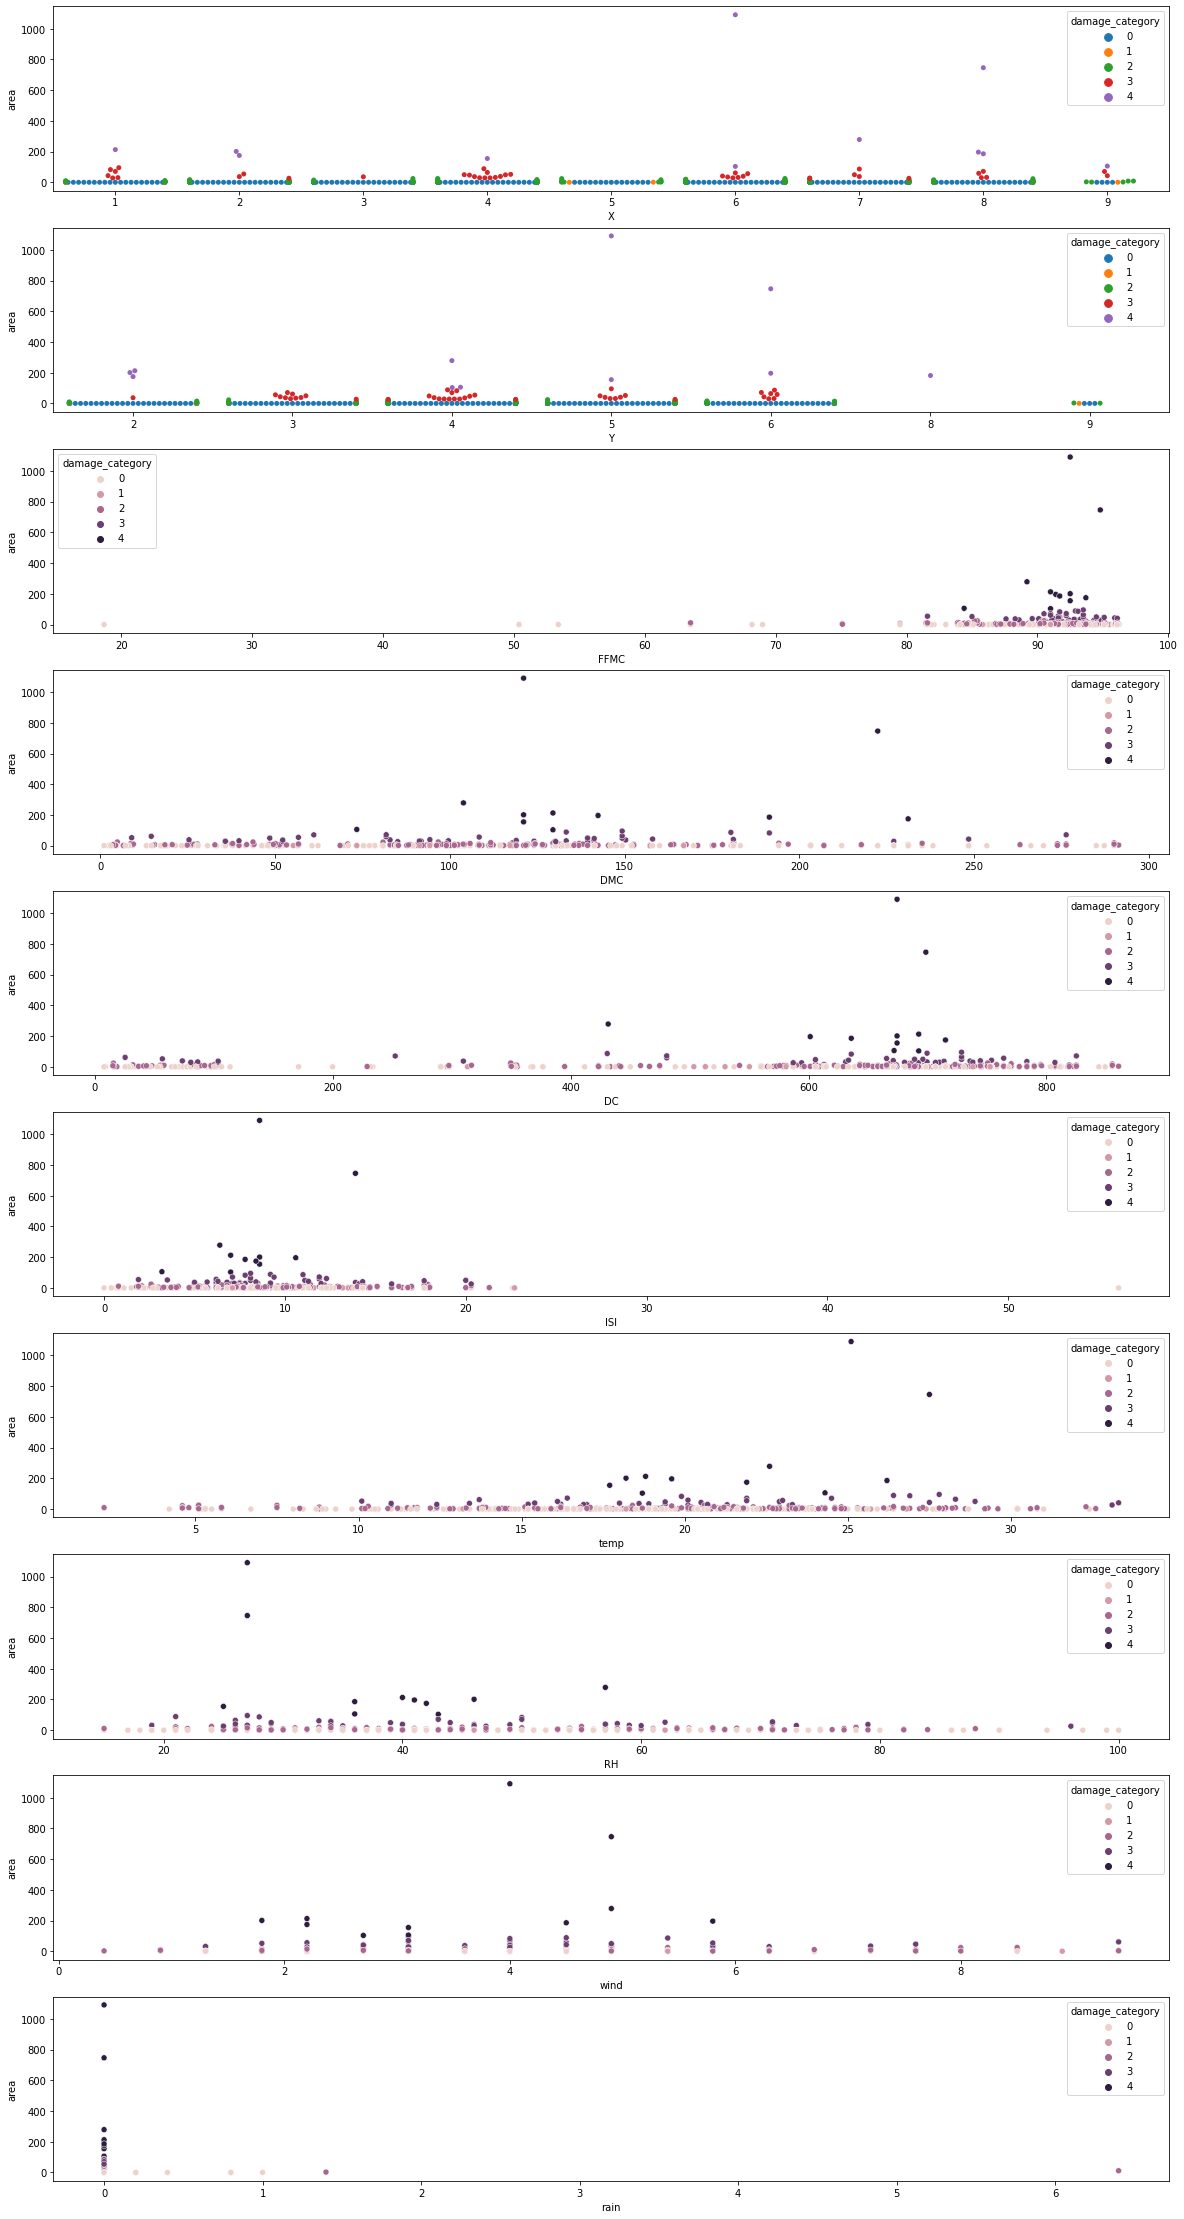

In [ ]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=df,x=col,y=target_var,hue='damage_category')
    else:
        sns.scatterplot(data=df,x=col,y=target_var,hue='damage_category')
plt.show()

### Multivariate analysis

In [ ]:
selected_features = df.drop(columns=['damage_category','day','month']).columns
selected_features

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'fire_status'],
      dtype='object')

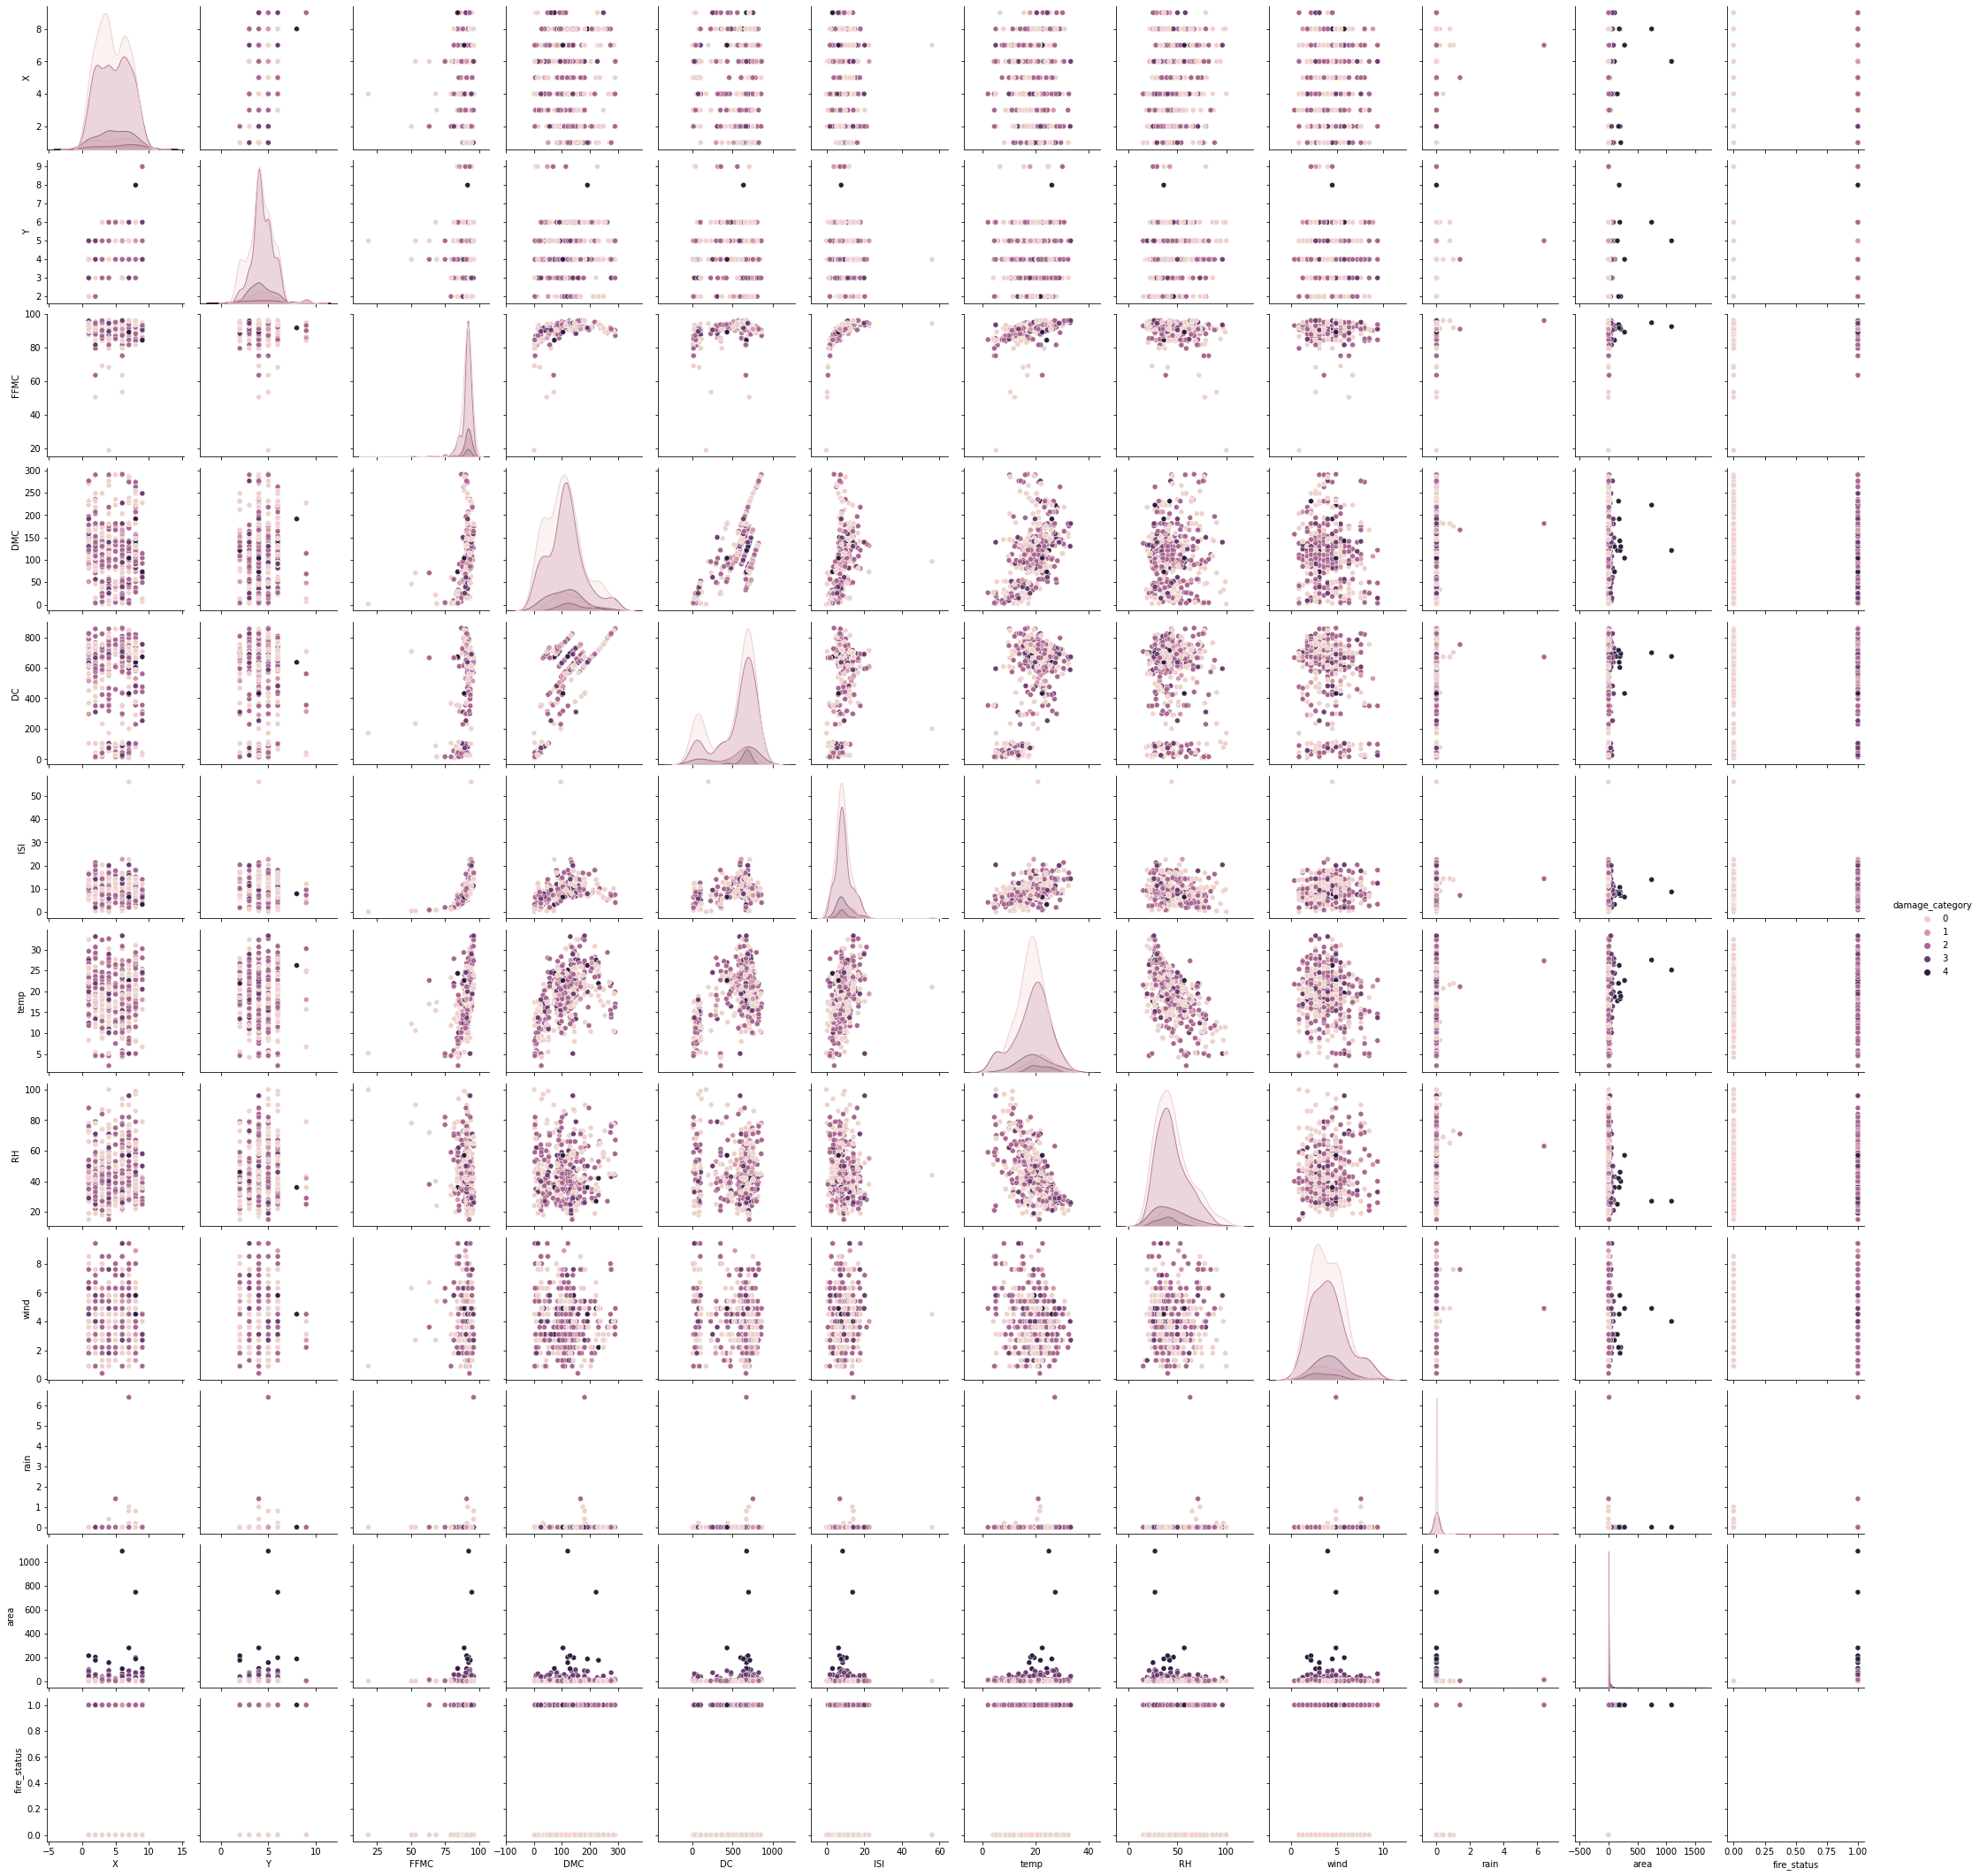

In [ ]:
sns.pairplot(df,hue='damage_category',vars=selected_features)
plt.show()

# E. Outlier treatment


**We had observed outliers in the following columns:**

*   area
*   FFMC
*   ISI
*   rain



In [ ]:
out_columns = ['area','FFMC','ISI','rain']

However, the above outliers are not error values so we cannot remove it.

In order to minimize the effect of outliers in our model we will transform the above features.

# F. Features engineering

Note : For EDA and above (Point A-E), was been created by Mas Raihan. For Feature Engineering and below (Point F-H) in classification case using deep learning, created by Andhika Rahadian

## Adding New Classifier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fire Forest Binary Class Distribution')

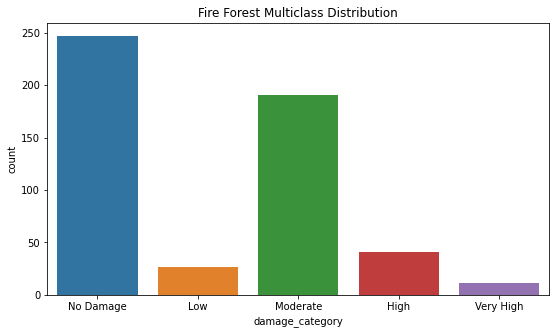

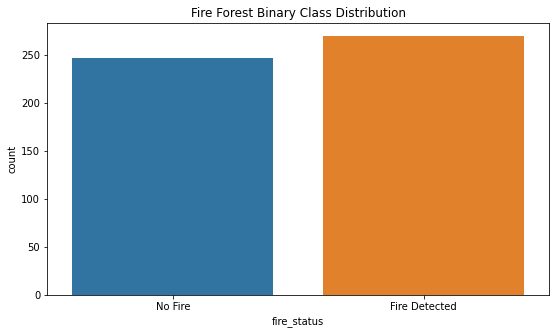

In [ ]:
'''
  Added Classifier from area column:
  Damage_Category -> 0 : No Damage, 1 : Low, 2 : Moderate, 3 : High, 4 : Very High
  Fire_Status -> 0 : No Forest Fire, 1 : Forest Fire Detected
'''
plt.figure(1)
sns.countplot(df_vis['damage_category'])
plt.title("Fire Forest Multiclass Distribution")

plt.figure(2)
sns.countplot(df_vis['fire_status'])
plt.title("Fire Forest Binary Class Distribution")

## Use Cyclic Method (Sin-Cos) for month and day feature

In [ ]:
## Mapping month and day dataframe to integer-valued
def mapping_month(month):
  switch_dict = {
        "jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4,
        "jun": 5, "jul": 6, "aug": 7, "sep": 8,
        "oct": 9, "nov": 10, "dec": 11
    }

  return switch_dict.get(month,12)

def mapping_day(day):
  switch_dict = {
      "mon": 0, "tue": 1, "wed": 2, "thu": 3, "fri": 4,
      "sat": 5, "sun": 6
  }

  return switch_dict.get(day,7)

df['month'] = df['month'].apply(mapping_month)
df['day'] = df['day'].apply(mapping_day)
df['month_sin'] = np.sin((df.month)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month)*(2.*np.pi/12))
df['day_sin'] = np.sin((df.day)*(2.*np.pi/7))
df['day_cos'] = np.cos((df.day)*(2.*np.pi/7))

# Drop Month and Day Feature (replaced by cyclical feature)
df.drop('month', inplace=True, axis=1)
df.drop('day', inplace=True, axis=1)

In [ ]:
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category,fire_status,month_sin,month_cos,day_sin,day_cos
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,0,0.866025,5.000000e-01,-0.433884,-0.900969
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,-1.000000,-1.836970e-16,0.781831,0.623490
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,-1.000000,-1.836970e-16,-0.974928,-0.222521
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,0,0.866025,5.000000e-01,-0.433884,-0.900969
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0.866025,5.000000e-01,-0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2,1,-0.500000,-8.660254e-01,-0.781831,0.623490
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,3,1,-0.500000,-8.660254e-01,-0.781831,0.623490
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2,1,-0.500000,-8.660254e-01,-0.781831,0.623490
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,-0.500000,-8.660254e-01,-0.974928,-0.222521


# G. MODELING

## Create Tensorflow-Keras MLP Base Model (Classification)

Two base model for : binary classifier (yes/no fire) and multiclass classifier (no, low, average, high, very high area) 

In [ ]:
# Binary Classifier
model_bin = Sequential()
model_bin.add(Dense(16, input_dim=15, activation='relu')) 
model_bin.add(Dense(1, activation='sigmoid'))

# Multiclass Classifier
model_multi = Sequential()
model_multi.add(Dense(64, input_dim=15, activation='relu')) 
model_multi.add(Dense(32, activation='relu')) 
model_multi.add(Dense(16, activation='relu')) 
model_multi.add(Dense(8, activation='relu')) 
model_multi.add(Dense(5, activation='softmax')) 

Summary of models, and compiling models

In [ ]:
model_bin.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 16)                256       
                                                                 
 dense_64 (Dense)            (None, 1)                 17        
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_multi.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 64)                1024      
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dense_67 (Dense)            (None, 16)                528       
                                                                 
 dense_68 (Dense)            (None, 8)                 136       
                                                                 
 dense_69 (Dense)            (None, 5)                 45        
                                                                 
Total params: 3,813
Trainable params: 3,813
Non-trainable params: 0
_________________________________________________________________


Compile Model

In [ ]:

# Binary Classification
model_bin.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Multiclass classification
model_multi.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Preparing dataset for classification model's input & output

In [ ]:
X = df.drop(['damage_category', 'fire_status'], axis = 1)
y_bin = df['fire_status']
y_multi = df['damage_category']

"""
 Using SMOTE for imbalanced data (multiclass)
"""
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X, y_multi)


"""
  Train, validation, test splitting
"""

# Train Test Split
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(X, y_bin,
    test_size=0.2, shuffle = True, random_state = 8)

Xmult_train, Xmult_test, ymult_train, ymult_test = train_test_split(X_smo, y_smo,
    test_size=0.2, shuffle = True, random_state = 8)

# Train Validation Split (Multiclass and Binary Class)
Xbin_train, Xbin_val, ybin_train, ybin_val = train_test_split(Xbin_train, ybin_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

Xmult_train, Xmult_val, ymult_train, ymult_val = train_test_split(Xmult_train, ymult_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


Using train-validation-test split with composition of 60%:20%:20%

Text(0.5, 1.0, 'Damage_Category Class count data after oversampled by SMOTE')

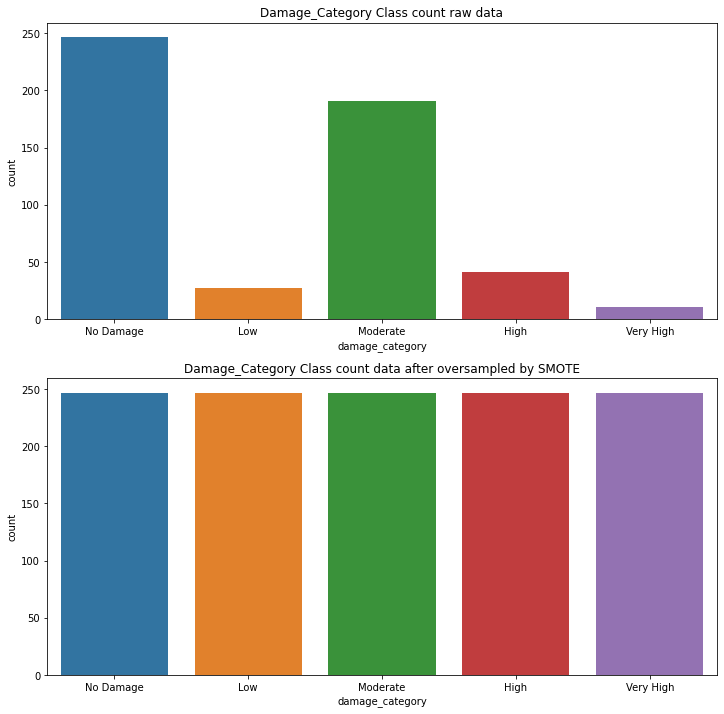

In [ ]:
fig, axes = plt.subplots(2, figsize=(12,12))
sns.countplot(ax=axes[0],x=df_vis['damage_category'])
axes[0].set_title("Damage_Category Class count raw data")

X_smo_vis,y_smo_vis = smo.fit_resample(X,df_vis['damage_category'])
sns.countplot(ax=axes[1],x=y_smo_vis)
axes[1].set_title("Damage_Category Class count data after oversampled by SMOTE")

In [ ]:
print("Binary Classifier Training Dataset Shape")
print("X_train shape: {}".format(Xbin_train.shape))
print("y_train shape: {}".format(ybin_train.shape))
print("X_test shape: {}".format(Xbin_test.shape))
print("y_test shape: {}".format(ybin_test.shape))
print("X_val shape: {}".format(Xbin_val.shape))
print("y_val shape: {}".format(ybin_val.shape))

print("Multiclass Training Dataset Shape")
print("X_train shape: {}".format(Xmult_train.shape))
print("y_train shape: {}".format(ymult_train.shape))
print("X_test shape: {}".format(Xmult_test.shape))
print("y_test shape: {}".format(ymult_test.shape))
print("X_val shape: {}".format(Xmult_val.shape))
print("y_val shape: {}".format(ymult_val.shape))


Binary Classifier Training Dataset Shape
X_train shape: (309, 15)
y_train shape: (309,)
X_test shape: (104, 15)
y_test shape: (104,)
X_val shape: (104, 15)
y_val shape: (104,)
Multiclass Training Dataset Shape
X_train shape: (741, 15)
y_train shape: (741,)
X_test shape: (247, 15)
y_test shape: (247,)
X_val shape: (247, 15)
y_val shape: (247,)


## Fit Models with the prepared dataset

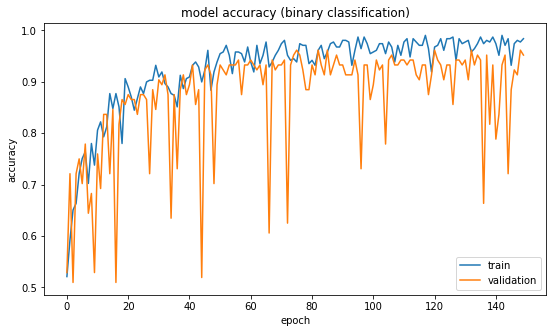

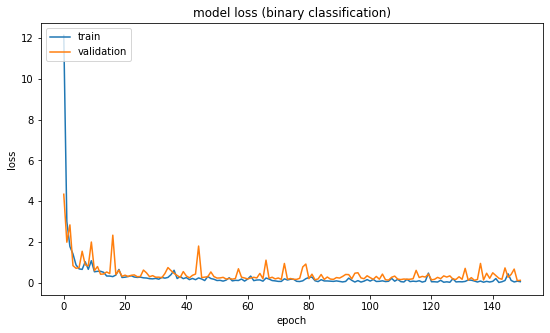

In [ ]:
n_epochs = 150
n_batch = 2
# fit model
history = model_bin.fit(Xbin_train, ybin_train, validation_data=(Xbin_val, ybin_val),verbose = 1, epochs=n_epochs, batch_size=n_batch)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy (binary classification)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss (binary classification)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

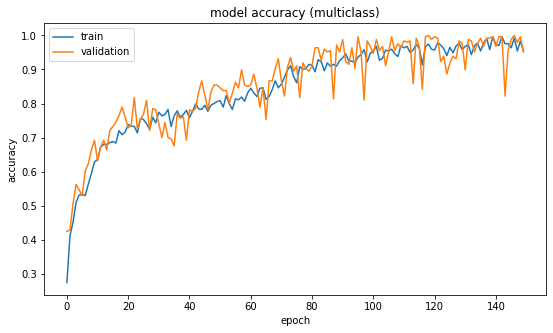

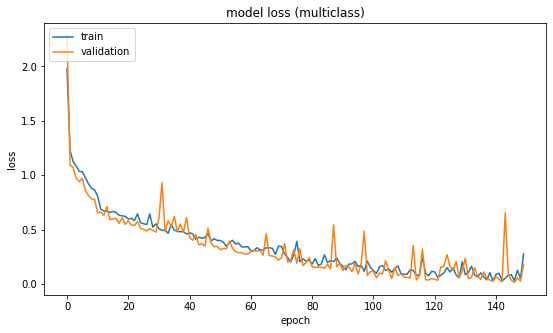

In [ ]:
n_epochs = 150
n_batch = 2
# fit model
historyMult = model_multi.fit(Xmult_train, ymult_train, validation_data=(Xmult_val, ymult_val), epochs=n_epochs, verbose = 1,batch_size=n_batch)
plt.plot(historyMult.history['accuracy'])
plt.plot(historyMult.history['val_accuracy'])
plt.title('model accuracy (multiclass)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(historyMult.history['loss'])
plt.plot(historyMult.history['val_loss'])
plt.title('model loss (multiclass)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


## Evaluate Model

Calculate Loss & Accuracy

In [ ]:
score_bin = model_bin.evaluate(Xbin_test, ybin_test, verbose = 0) 
score_mult = model_multi.evaluate(Xmult_test, ymult_test, verbose = 0) 

print('Test loss (Binary Classifier):', score_bin[0]) 
print('Test accuracy (Binary Classifier):', score_bin[1])
print('Test loss (Multiclass):', score_mult[0]) 
print('Test accuracy (Multiclass):', score_mult[1])

Test loss (Binary Classifier): 0.14859940111637115
Test accuracy (Binary Classifier): 0.942307710647583
Test loss (Multiclass): 0.17761167883872986
Test accuracy (Multiclass): 0.9595141410827637


Calculate AUC value and Plot ROC Curve for Binary Classifier



In [ ]:
# Determine AUC ( Area Under Curve ) value
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

ybin_pred = model_bin.predict(Xbin_test).ravel()
fpr, tpr, thresholds = roc_curve(ybin_test, ybin_pred)
auc_value = auc(fpr, tpr)

print("AUC Value (Binary Classifier): {}".format(auc_value))


AUC Value (Binary Classifier): 0.9951905290418054


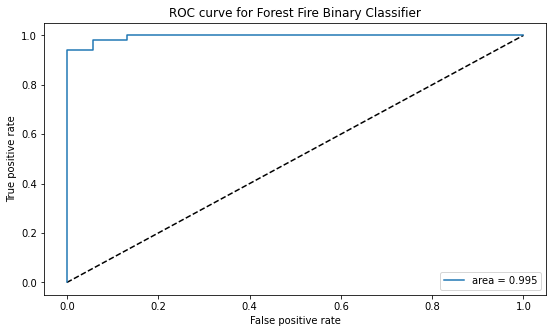

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='area = {:.3f}'.format(auc_value))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Forest Fire Binary Classifier')
plt.legend(loc='best')
plt.show()



# H. Experiment Parameter

From the base result, We need:

*   EarlyStopping, especially the model_bin
*   Slightly Increase the optimizer's learning rate (for faster convergence)
*   Slightly decrease batch_size

In this case, only binary classifier would be tuned for performance improvement experiment (because the multiclass model, still based on a biased data "using SMOTE'd data for all train, validation, test")

The Proof of Concept Experiment is based on above three hyperparameter tuning. The variation of each hyperparameter (learning rate, epoch, batch size) would be described below as the hyperparameter tuning experiment to get a best model




##  "Proof Of Concept" Experiment

Epoch 1/125
155/155 [==============================] - 1s 4ms/step - loss: 10.5342 - accuracy: 0.5307 - val_loss: 9.4871 - val_accuracy: 0.4231
Epoch 2/125
155/155 [==============================] - 0s 2ms/step - loss: 1.6085 - accuracy: 0.6472 - val_loss: 1.2528 - val_accuracy: 0.5096
Epoch 3/125
155/155 [==============================] - 0s 2ms/step - loss: 1.2400 - accuracy: 0.7152 - val_loss: 0.3791 - val_accuracy: 0.8462
Epoch 4/125
155/155 [==============================] - 0s 2ms/step - loss: 0.8491 - accuracy: 0.7799 - val_loss: 3.5685 - val_accuracy: 0.5192
Epoch 5/125
155/155 [==============================] - 0s 2ms/step - loss: 1.0341 - accuracy: 0.7638 - val_loss: 0.4430 - val_accuracy: 0.8558
Epoch 6/125
155/155 [==============================] - 0s 2ms/step - loss: 0.8960 - accuracy: 0.7670 - val_loss: 0.2720 - val_accuracy: 0.8942
Epoch 7/125
155/155 [==============================] - 0s 2ms/step - loss: 1.0912 - accuracy: 0.7864 - val_loss: 0.4249 - val_accuracy: 0.778

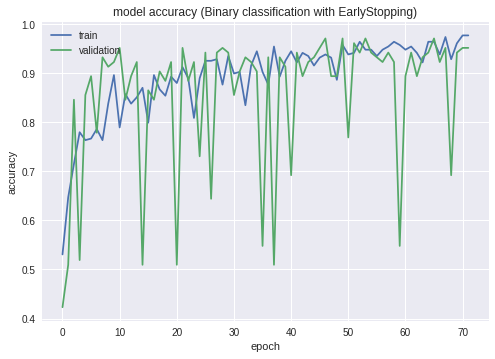

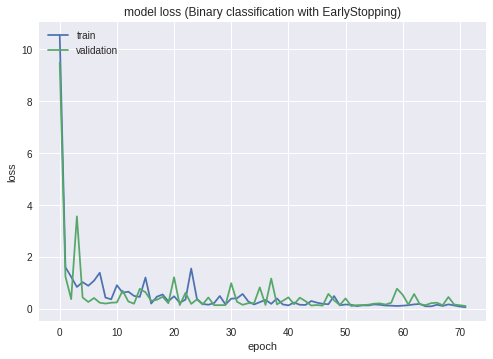

Test loss (Binary Classifier with EarlyStopping): 0.09969604760408401
Test accuracy (Binary Classifier EarlyStopping): 0.9711538553237915


In [ ]:
from keras.callbacks import EarlyStopping
plt.style.use('seaborn')
# Binary Classifier with Early Stopping
model_bin_es = Sequential()
model_bin_es.add(Dense(16, input_dim=15, activation='relu')) 
model_bin_es.add(Dense(1, activation='sigmoid'))

#=====================================================================================================
# Compile Models

# Optimizers
# opt = SGD(learning_rate=0.01, momentum=0.6)
opt = Adam(learning_rate=0.005)

# Early Stopping
es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=20,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

# Binarry Classifier
model_bin_es.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) # default lr = 0.001
#=====================================================================================================
# Fit Model
n_epochs = 125 # Decreased into 125
n_batch = 2
history_es = model_bin_es.fit(Xbin_train, ybin_train, 
                              validation_data=(Xbin_val, ybin_val),
                              verbose = 1, epochs=n_epochs, 
                              batch_size=n_batch,
                              callbacks=[es])
#=====================================================================================================
# Evaluate Model
plt.plot(history_es.history['accuracy'])
plt.plot(history_es.history['val_accuracy'])
plt.title('model accuracy (Binary classification with EarlyStopping)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history_es.history['loss'])
plt.plot(history_es.history['val_loss'])
plt.title('model loss (Binary classification with EarlyStopping)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

score_bin = model_bin_es.evaluate(Xbin_test, ybin_test, verbose = 0) 
print('Test loss (Binary Classifier with EarlyStopping):', score_bin[0]) 
print('Test accuracy (Binary Classifier with EarlyStopping):', score_bin[1])

## Base Function For Hyperparameter Tuning

In [ ]:
from keras.callbacks import EarlyStopping
plt.style.use('seaborn')

# Hyperparameter Candidate Values
lr = [0.001,0.005,0.0075,0.01,0.05,0.075]
n_epoch = [50,100,150,200,300,500]
n_batchsize = [1,2,5,10,15,20]

def hyper_param_tuning(lr,n_epoch,n_batchsize,tuning_mode):
  scores = []
  plt.figure(figsize=(15, 20))
  for i in range(len(lr)):
    # Binary Classifier with Early Stopping
    model_bin_es = Sequential()
    model_bin_es.add(Dense(16, input_dim=15, activation='relu')) 
    model_bin_es.add(Dense(1, activation='sigmoid'))

    #=====================================================================================================
    # Compile Models

    # Hyperparameters to be Tuned
    if (tuning_mode == "lr"):
      opt = Adam(learning_rate=lr[i])
    else:
      opt = Adam(learning_rate=0.001) #default base model

    if (tuning_mode == "epoch"):
      n_epochs = n_epoch[i] 
    else:
      n_epochs = 150 # default base model
    
    if (tuning_mode == "batch_size"):
      n_batch = n_batchsize[i] 
    else:
      n_batch = 2 # default base model

    # Early Stopping
    es = EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=20,
        verbose=0,
        mode='auto',
        baseline=None,
        restore_best_weights=False
    )

    # Binarry Classifier
    model_bin_es.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) # default lr = 0.001
    #=====================================================================================================
    # Fit Model
 
    history_es = model_bin_es.fit(Xbin_train, ybin_train, 
                                  validation_data=(Xbin_val, ybin_val),
                                  verbose = 0, epochs=n_epochs, 
                                  batch_size=n_batch,
                                  callbacks=[es])
    #=====================================================================================================
    # Evaluate Model
    plot_num = 420 + (i+1)
    plt.subplot(plot_num)
    plt.plot(history_es.history['accuracy'])
    plt.plot(history_es.history['val_accuracy'])
    if (tuning_mode == "lr"):
      plt.title('model accuracy, learning rate: ({})'.format(lr[i]))
    elif (tuning_mode == "epoch"):
      plt.title('model accuracy, epoch: ({})'.format(n_epoch[i]))
    elif (tuning_mode == "batch_size"):
      plt.title('model accuracy, batch_size: ({})'.format(n_batchsize[i]))

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    

    score_bin = model_bin_es.evaluate(Xbin_test, ybin_test, verbose = 0) 
    scores.append(score_bin)

  return scores



### Hyperparameter Tuning Experiment : Learning Rate

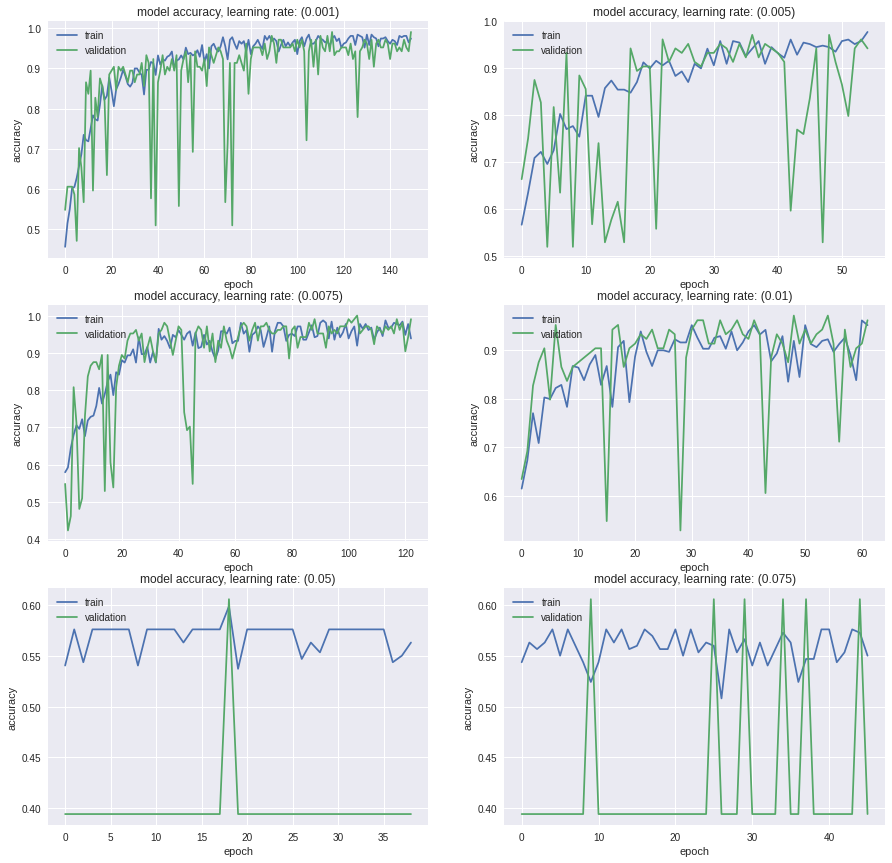

In [ ]:
scoreslr = hyper_param_tuning(lr,n_epoch,n_batchsize,tuning_mode="lr")

In [ ]:
scoreslr = np.array(scoreslr)
scoreslr = scoreslr.T
df_scoreslr = pd.DataFrame(lr)
df_scoreslr['loss'] = scoreslr[0]*100
df_scoreslr['accuracy'] = scoreslr[1]*100
df_scoreslr.columns=['learning_rate','loss','accuracy']

### Hyperparameter Tuning Experiment : Epoch

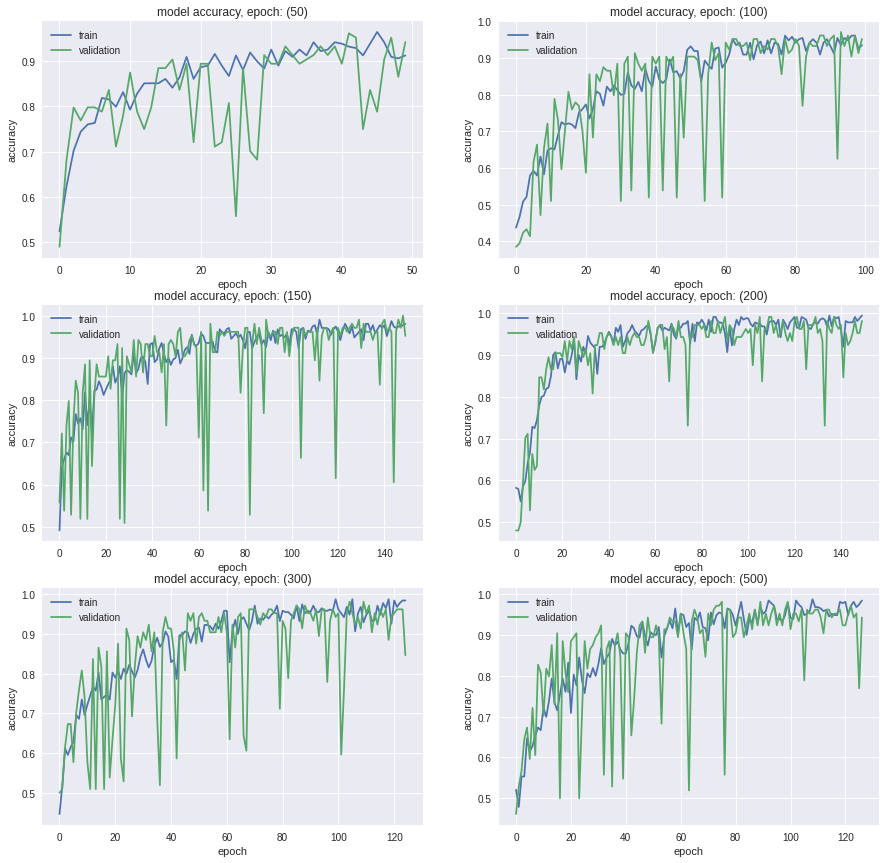

In [ ]:
scoresep = hyper_param_tuning(lr,n_epoch,n_batchsize,tuning_mode="epoch")

In [ ]:
scoresep = np.array(scoresep)
scoresep = scoresep.T
df_scoresep = pd.DataFrame(n_epoch)
df_scoresep['loss'] = scoresep[0]*100
df_scoresep['accuracy'] = scoresep[1]*100
df_scoresep.columns=['epochs','loss','accuracy']
df_scoresep

,epochs,loss,accuracy
0,50,14.956738,94.230771
1,100,9.259152,96.153843
2,150,14.819978,98.076922
3,200,7.125933,98.076922
4,300,22.103335,91.346157
5,500,16.778907,97.115386


### Hyperparameter Tuning Experiment : Batch Size

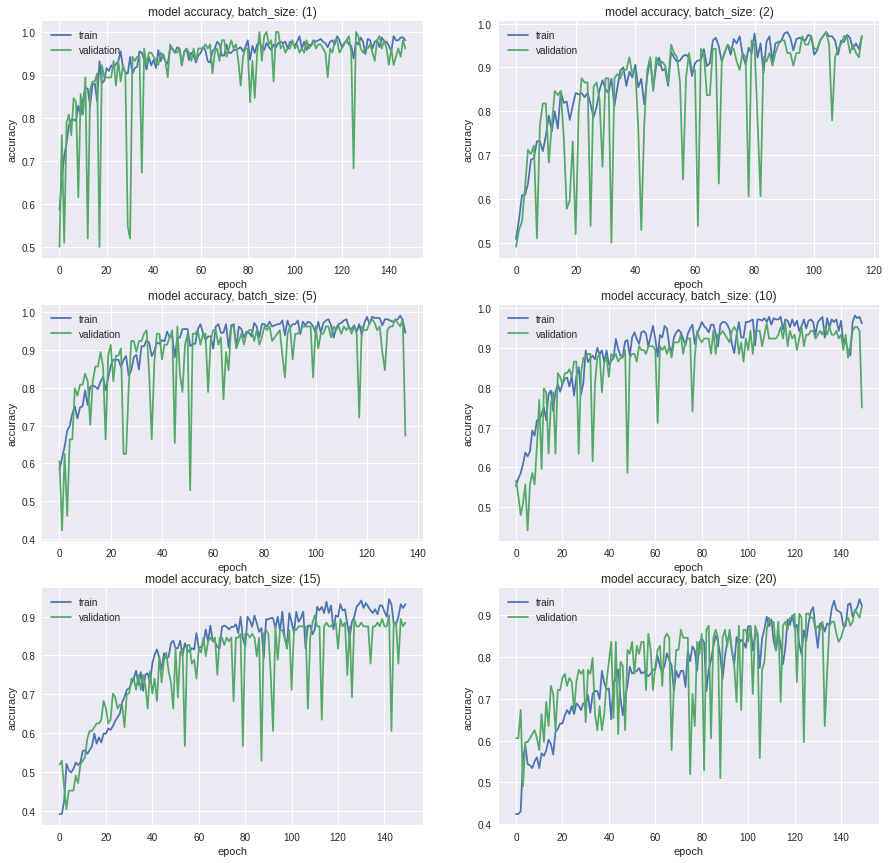

In [ ]:
scoresbs = hyper_param_tuning(lr,n_epoch,n_batchsize,tuning_mode="batch_size")

In [ ]:
scoresbs = np.array(scoresbs)
scoresbs = scoresbs.T
df_scoresbs = pd.DataFrame(n_batchsize)
df_scoresbs['loss'] = scoresbs[0]*100
df_scoresbs['accuracy'] = scoresbs[1]*100
df_scoresbs.columns=['Batch_Size','loss','accuracy']
df_scoresbs

,Batch_Size,loss,accuracy
0,1,10.584165,97.115386
1,2,7.864444,96.153843
2,5,38.806871,80.769229
3,10,32.726163,85.576922
4,15,26.474145,87.500000
5,20,24.016522,94.230771


### Wrap Up Accuracy Result

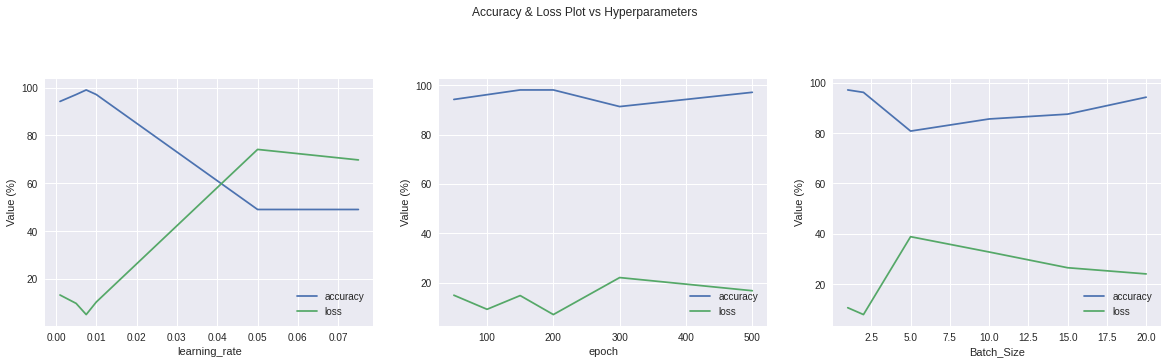

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 10))
plt.suptitle("Accuracy & Loss Plot vs Hyperparameters")
plt.subplot(231)
plt.plot(df_scoreslr['learning_rate'], df_scoreslr['accuracy'])
plt.plot(df_scoreslr['learning_rate'], df_scoreslr['loss'])
plt.ylabel('Value (%)')
plt.xlabel('learning_rate')
plt.legend(['accuracy', 'loss'], loc='lower right')

plt.subplot(232)
plt.plot(df_scoresep['epochs'], df_scoresep['accuracy'])
plt.plot(df_scoresep['epochs'], df_scoresep['loss'])
plt.ylabel('Value (%)')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='lower right')

plt.subplot(233)
plt.plot(df_scoresbs['Batch_Size'], df_scoresbs['accuracy'])
plt.plot(df_scoresbs['Batch_Size'], df_scoresbs['loss'])
plt.ylabel('Value (%)')
plt.xlabel('Batch_Size')
plt.legend(['accuracy', 'loss'], loc='lower right')
    